# 5.Visualization



Preprint at https://www.biorxiv.org/content/10.1101/2022.10.20.513114v1

*Yiyu Wang 2024 April*

In [1]:
import glob
import os
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib
import warnings

# stats
from scipy import linalg, ndimage, stats
from scipy.stats import norm

# nifti handling
from nilearn.input_data import NiftiMasker
from nilearn import decoding
from nilearn.masking import apply_mask, intersect_masks
from nilearn import image
from nilearn.image import new_img_like, load_img, get_data, concat_imgs, mean_img,math_img
from nilearn.reporting import get_clusters_table
from nilearn.glm import threshold_stats_img
from nilearn import surface

# nilearn mask:
from nilearn.datasets import load_mni152_gm_mask,load_mni152_wm_mask,fetch_surf_fsaverage


# plotting modules
from nilearn import plotting
from nilearn.plotting import plot_stat_map, plot_prob_atlas, plot_img, show
from nilearn.image import threshold_img
from nilearn.plotting import plot_roi
from nilearn import surface
fsaverage = fetch_surf_fsaverage()

warnings.filterwarnings('ignore')

/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/__init__.py:67: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
permutation_test_res_dir = 'results/permutation_test/'

mask_dir = 'masks/'
bg_img = mask_dir + 'MNI152_T1_1mm_brain.nii.gz'


In [3]:
# plot the results:
def make_surface(texture_left, texture_right, title=' ', vmin=-0.01, vmax=0.5, threshold=0.05, output_dir=permutation_test_res_dir):

    fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(14,10), subplot_kw={'projection': '3d'})
    cbar_ax = fig.add_axes([.91, .3, .03, .4])

    plotting.plot_surf(fsaverage.infl_left, texture_left,view='lateral', hemi='left', cmap="plasma",
                                colorbar=False,vmin=vmin, vmax =vmax,avg_method='median', threshold = threshold,
                                bg_map=fsaverage.sulc_left,axes=ax[0,0], darkness = 0.5, inflate=True)


    plotting.plot_surf(fsaverage.infl_right, texture_right,view='lateral', hemi='right', cmap="plasma",
                                colorbar=False, vmin=vmin,vmax =vmax,avg_method='median', threshold = threshold,
                                bg_map=fsaverage.sulc_right, axes=ax[0,1], darkness = 0.5, inflate=True)


    plotting.plot_surf(fsaverage.infl_left, texture_left,view='medial', hemi='left', cmap="plasma",
                                colorbar=False, vmin=vmin, vmax=vmax,avg_method='median', threshold = threshold,
                                bg_map=fsaverage.sulc_left,axes=ax[1,0], darkness = 0.5, inflate=True)

    plotting.plot_surf(fsaverage.infl_right, texture_right,view='medial', hemi='right', cmap="plasma",
                                colorbar=False, vmin=vmin,vmax =vmax, avg_method='median', threshold = threshold,
                                bg_map=fsaverage.sulc_right,axes=ax[1,1], darkness = 0.5, inflate=True)

    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cbar = matplotlib.colorbar.ColorbarBase(
        cbar_ax,
        ticks=[0.18, 0.5],
        norm=norm,
        orientation="vertical",
        cmap='plasma',
        spacing="proportional",
    )
    cbar_ax.set_yticklabels(["0.18", "0.5"])
    cbar.ax.axhline(y=0.18) 
    plt.title(title)
    plt.savefig(output_dir + title + 'rvalue_surface.png')
    plt.show()



# Across-Situation Model

In [4]:
# load each situation:
situation_list = ['Heights', 'Social', 'Spiders']

0.46243686282827495
0.0


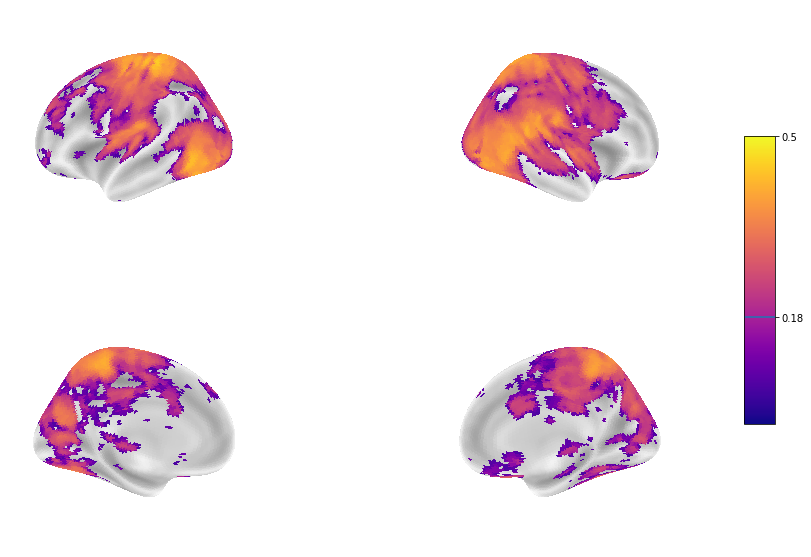

0.3212481591135689
0.0


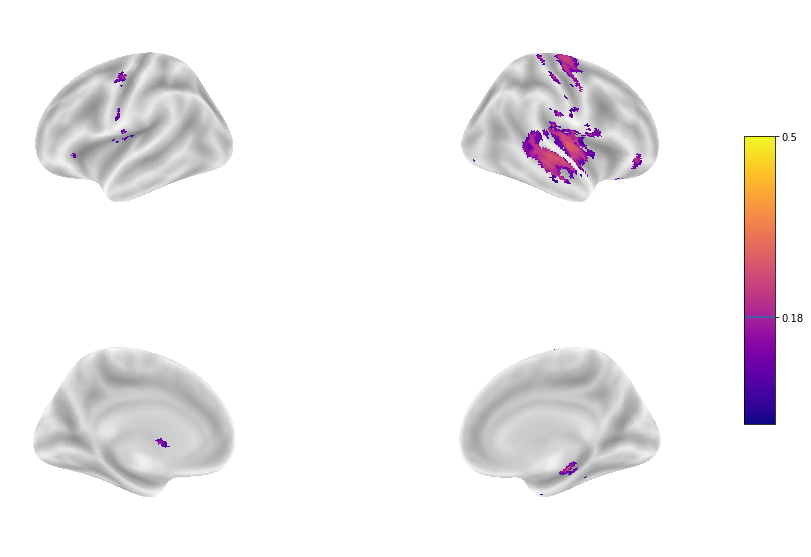

0.4065020001497908
0.0


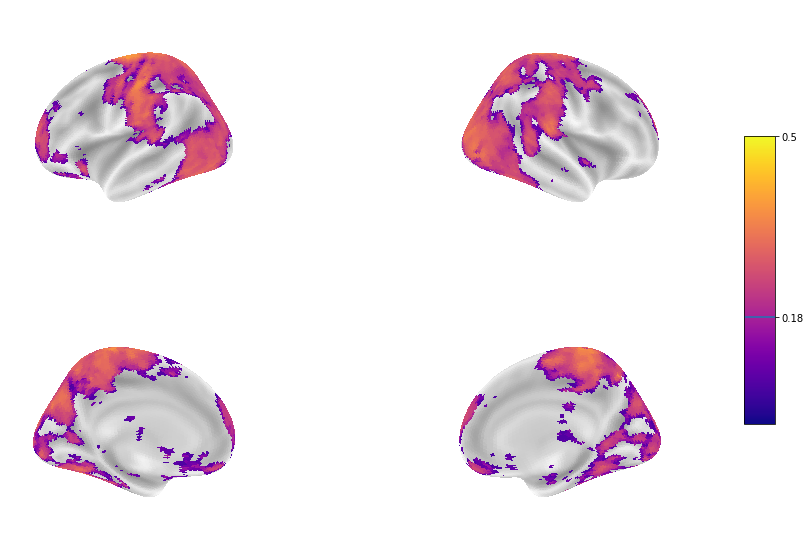

In [6]:

for situation in situation_list:
    overlay = nib.load(permutation_test_res_dir + 'train_Situation_General_test_' + situation + '_significant_pearsonr_fwe.nii.gz')

    print(np.max(overlay.get_fdata()))
    print(np.min(overlay.get_fdata()))
    texture_right = surface.vol_to_surf(overlay, fsaverage.pial_right, interpolation='nearest')
    texture_left = surface.vol_to_surf(overlay, fsaverage.pial_left, interpolation='nearest')
    make_surface(texture_left=texture_left, texture_right=texture_right, threshold=0.05)



# Situation-by-Situation model:

0.46073737765266715
0.0


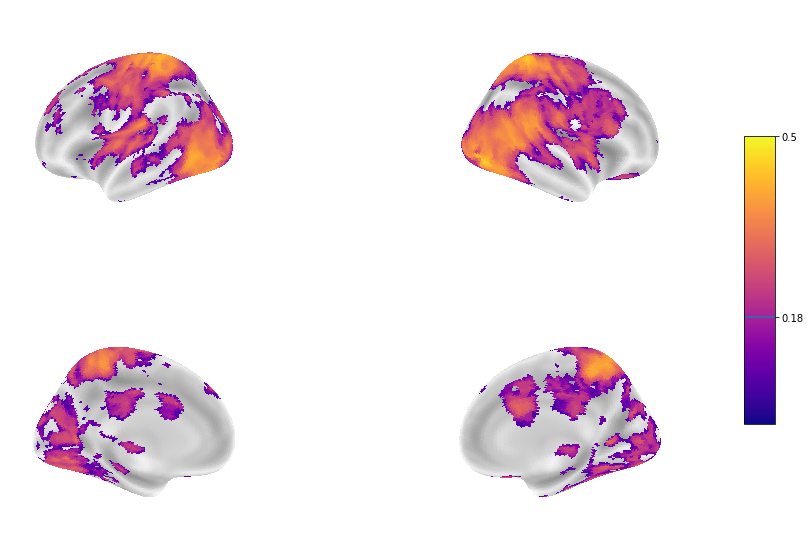

0.33387996345907717
0.0


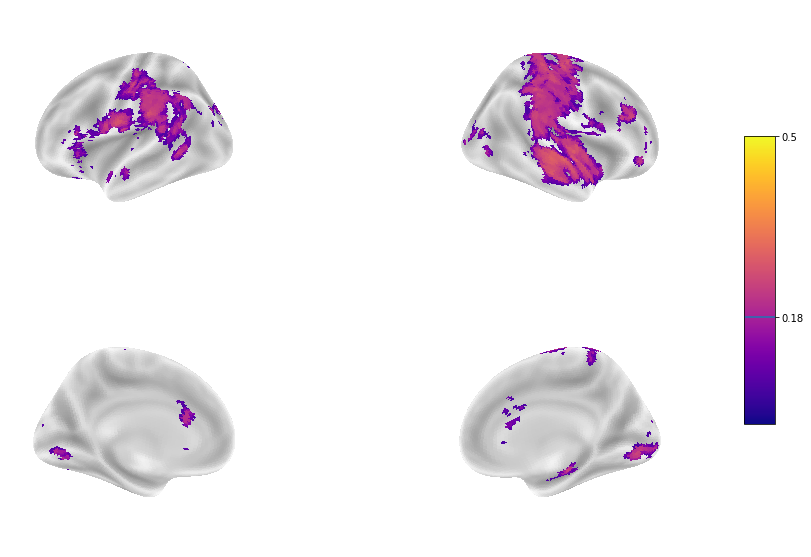

0.4212976150099146
0.0


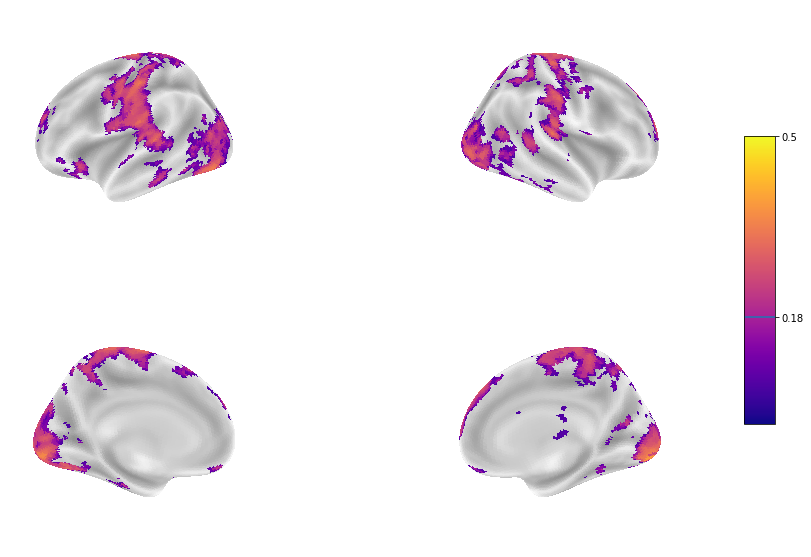

In [7]:
for situation in situation_list:
    overlay = nib.load(permutation_test_res_dir + f'train_{situation}_test_{situation}_significant_pearsonr_fwe.nii.gz')
    print(np.max(overlay.get_fdata()))
    print(np.min(overlay.get_fdata()))
    texture_right = surface.vol_to_surf(overlay, fsaverage.pial_right, interpolation='nearest')
    texture_left = surface.vol_to_surf(overlay, fsaverage.pial_left, interpolation='nearest')
    make_surface(texture_left=texture_left, texture_right=texture_right, threshold=0.05)